In [1]:
import tensorflow as tf
import PIL
import os
import numpy as np
import cv2
import zipfile
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import pathlib

img_height,img_width,batch_size=100,100,32
folder_dir = r"C:\Users\Dhruv\Downloads\fruits\fruits"
  
train_ds = tf.keras.utils.image_dataset_from_directory(
  folder_dir,
  seed=130,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  folder_dir,
  seed=130,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width), 
  batch_size=batch_size)
class_names=train_ds.class_names

classes={0:"Strawberry",1:"Orange",2:"Mango",3:"Corn",4:"Banana"}


Found 2401 files belonging to 5 classes.
Using 1921 files for training.
Found 2401 files belonging to 5 classes.
Using 480 files for validation.


In [4]:
import matplotlib.pyplot as plt


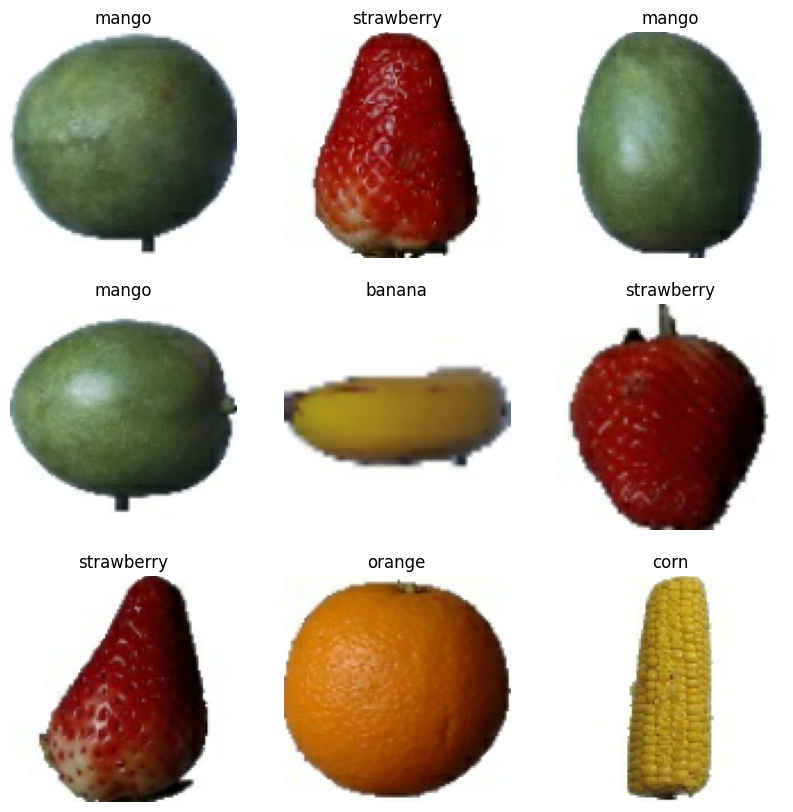

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
def generate_callback(path = "/content/drive/MyDrive/fabric_classification/", filename = "placeholder"):
    checkpoint = ModelCheckpoint(filepath = f'{path}{filename}.h5', monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')

    return checkpoint

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
da = tf.keras.Sequential(
    [
        tf.keras.layers.RandomContrast(0.5),
        tf.keras.layers.RandomZoom(0.5)
    ]
)

In [9]:
num_classes = 5
resnet_model=Sequential()
pretrained_model=tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(img_height,img_width,3),
    pooling='max',
    classes=num_classes
)

for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.4))
resnet_model.add(Dense(num_classes, activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 23,850,629
Trainable params: 262,917
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
resnet_model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])
checkpoint = generate_callback("/content/drive/MyDrive/fabric_classification/", "tomfile")
epochs=5
hist=resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs, callbacks=[checkpoint])

Epoch 1/5
60/61 [============================>.] - ETA: 0s - loss: 0.5085 - accuracy: 0.9411
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /content/drive/MyDrive/fabric_classification\tomfile.h5
61/61 [==============================] - 29s 434ms/step - loss: 0.5082 - accuracy: 0.9412 - val_loss: 9.4374e-09 - val_accuracy: 1.0000
Epoch 2/5
60/61 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9990
Epoch 2: val_accuracy did not improve from 1.00000
61/61 [==============================] - 21s 343ms/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 2.4835e-10 - val_accuracy: 1.0000
Epoch 3/5
60/61 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9995
Epoch 3: val_accuracy did not improve from 1.00000
61/61 [==============================] - 21s 349ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 1.7385e-09 - val_accuracy: 1.0000
Epoch 4/5
60/61 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 

In [12]:
converter=tf.lite.TFLiteConverter.from_keras_model(resnet_model)
tflite_model=converter.convert()
open(r"C:\Users\Dhruv\Desktop\hi\linear.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Dhruv\AppData\Local\Temp\tmp8c3whnxi\assets


INFO:tensorflow:Assets written to: C:\Users\Dhruv\AppData\Local\Temp\tmp8c3whnxi\assets


95019132

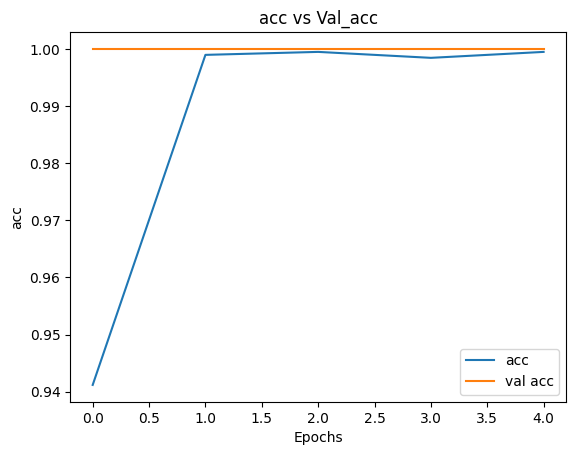

In [13]:
plt.plot(hist.history['accuracy'], label = 'acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [14]:
resnet_model.save("RnP.pbtxt")

INFO:tensorflow:Assets written to: RnP.pbtxt\assets


INFO:tensorflow:Assets written to: RnP.pbtxt\assets


In [15]:
resnet_model.evaluate(val_ds)

15/15 [==============================] - 4s 264ms/step - loss: 1.7385e-09 - accuracy: 1.0000


[1.7384681472165653e-09, 1.0]

In [17]:
#prediction=resnet_model.predict(val_ds)
image=cv2.imread(r"C:/Users/Dhruv/Downloads/apple.jpg")
from tensorflow.keras.preprocessing import image
img=image.load_img(r"C:\Users\Dhruv\Pictures\Screenshots\Screenshot 2023-08-22 234608.png",target_size=(100,100))
img_array=image.img_to_array(img)
img_batch=np.expand_dims(img_array,axis=0)
prediction=resnet_model.predict(img_batch)
#prediction_self=resnet_model.predict(r"C:/Users/Dhruv/Downloads/apple.jpg")
#prediction

1/1 [==============================] - 2s 2s/step


In [18]:
pred_val = np.argmax(prediction, axis=1)
test_val = tf.concat([y for x, y in val_ds], axis=0)
print(class_names[pred_val[0]])

strawberry


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        97

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

[[ 91   0   0   0   0]
 [  0  94   0   0   0]
 [  0   0 112   0   0]
 [  0   0   0  86   0]
 [  0   0   0   0  97]]


C:\Users\Dhruv\AppData\Local\Temp\ipykernel_10216\142267593.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
C:\Users\Dhruv\AppData\Local\Temp\ipykernel_10216\142267593.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


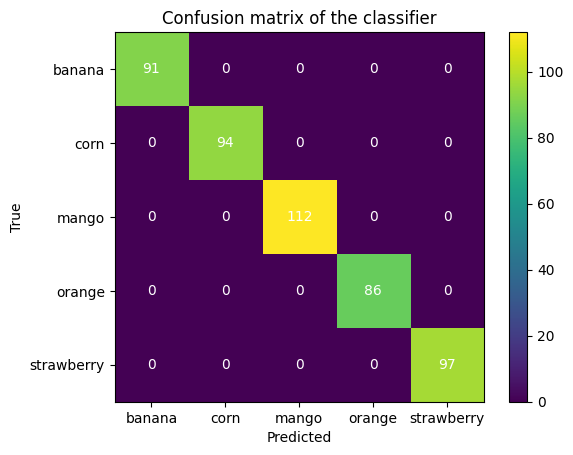

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_val, pred_val))
print(confusion_matrix(test_val, pred_val))
cm=confusion_matrix(test_val, pred_val)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm)
plt.title('Confusion matrix of the classifier')
for i in range(5):
    for j in range(5):
        text = ax.text(j, i, cm[i,j],
                       ha="center", va="center", color="w")
fig.colorbar(cax)
ax.set_xticklabels([''] + class_names)
ax.set_yticklabels([''] + class_names)
ax
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()